In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
BMS = pd.read_csv(r'/kaggle/input/big-mart-sales/train_v9rqX0R.csv')
BMS.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [198]:
BMS.shape

(8523, 12)

In [199]:
BMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [200]:
BMS.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [201]:
BMS.drop(['Outlet_Identifier', 'Item_Identifier'], axis = 1, inplace = True)

In [202]:
num_cols = [cols for cols in BMS.columns if BMS[cols].dtype in ['int64', 'float64']]
cat_cols = [cols for cols in BMS.columns if BMS[cols].dtype == 'object'] 

In [203]:
for cols in num_cols:
    k = BMS[cols].median()
    if(BMS[cols].isnull().sum() != 0):
        BMS[cols].fillna(k, inplace = True)

In [204]:
def fills(s):
    if(pd.isnull(s['Outlet_Size'])):
        if(s['Outlet_Type'] == 'Supermarket Type1'):
            s['Outlet_Size'] =  np.random.choice(['Small', 'High', 'Medium'], p = [0.5, 0.25, 0.25])
            
        elif(s['Outlet_Type'] == 'Supermarket Type2'):
            s['Outlet_Size'] = 'Medium'
            
        elif(s['Outlet_Type'] == 'Supermarket Type3'):
            s['Outlet_Size'] = 'Medium'
            
        else:
            s['Outlet_Size'] = 'Small'
            
    else:
        s = s
        
    return s    
            
BMS = BMS.apply(fills, axis = 1)        

In [205]:
def cleaning(x):
    if(x == 'low fat'):
        x = 'Low Fat'
    elif(x == 'LF'):
        x = 'Low Fat'
    elif(x == 'reg'):
        x = 'Regular'
    else:
        x = x
    return x

BMS['Item_Fat_Content'] = BMS['Item_Fat_Content'].apply(lambda x: cleaning(x))

In [206]:
BMS.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [208]:
for cols in num_cols:
    k = np.array(BMS[cols])
    k = k.reshape(-1, 1)
    k = scaler.fit_transform(k)
    BMS[cols] = k 

In [209]:
d = {
    
    'Grocery Store' : 0.04,
    'Supermarket Type1' : 0.28,
    'Supermarket Type2' : 0.24,
    'Supermarket Type3' : 0.44
}

BMS['Outlet_Type'] = BMS['Outlet_Type'].map(d)

In [210]:
d = {
    
    'Tier 1' : 0.29,
    'Tier 3' : 0.36,
    'Tier 2' : 0.35
}

BMS['Outlet_Location_Type'] = BMS['Outlet_Location_Type'].map(d)

In [211]:
d = {
    
    'Medium' : 0.33,
    'High' : 0.39,
    'Small' : 0.27
}

BMS['Outlet_Size'] = BMS['Outlet_Size'].map(d)

In [212]:
d = {
    
    'Dairy' : 0.056,
    'Soft Drinks' : 0.063,
    'Meat' : 0.06,
    'Fruits and Vegetables' : 0.064,
    'Household' : 0.064,
    'Baking Goods' : 0.061,
    'Snack Foods' : 0.066,
    'Frozen Foods' : 0.061,
    'Breakfast' : 0.058,
    'Health and Hygiene' : 0.065,
    'Hard Drinks' : 0.062,
    'Canned' : 0.055,
    'Breads' : 0.067,
    'Starchy Foods' : 0.065,
    'Others' : 0.058,
    'Seafood' : 0.068 
    
}

BMS['Item_Type'] = BMS['Item_Type'].map(d)

In [213]:
d = {
    
    'Low Fat' : 0.49,
    'Regular' : 0.51
}

BMS['Item_Fat_Content'] = BMS['Item_Fat_Content'].map(d)

In [214]:
BMS.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.831187,0.49,-0.970732,0.056,1.747454,0.139541,0.33,0.29,0.28,0.910601
1,-1.630810,0.51,-0.908111,0.063,-1.489023,1.334103,0.33,0.36,0.24,-1.018440
2,1.108727,0.49,-0.956917,0.060,0.010040,0.139541,0.33,0.29,0.28,-0.049238
3,1.510904,0.51,-1.281758,0.064,0.660050,0.020085,0.27,0.36,0.04,-0.849103
4,-0.918719,0.49,-1.281758,0.064,-1.399220,-1.293934,0.39,0.36,0.28,-0.695373


In [215]:
X = BMS.drop('Item_Outlet_Sales', axis = 1)

In [216]:
y = BMS['Item_Outlet_Sales']

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Root_Mean_Squared_error : 1151.6817667573084
Mean_Absolute_error : 793.0601919530791


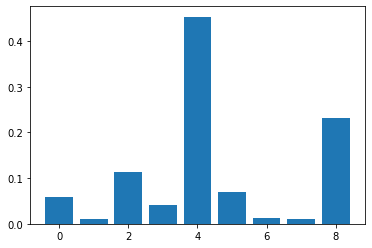

In [218]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
fi = model.feature_importances_
plt.bar([i for i in range(len(fi))], fi)

k = np.array(predictions)
k = k.reshape(-1, 1)
k = scaler.inverse_transform(k)
predictions = k 

k = np.array(y_test)
k = k.reshape(-1, 1)
k = scaler.inverse_transform(k)
y_test = k 

print('Root_Mean_Squared_error :', np.sqrt(mean_squared_error(y_test, predictions)))
print('Mean_Absolute_error :', (mean_absolute_error(y_test, predictions)))

In [219]:
from joblib import dump

dump(model, r'/kaggle/working/RFRegressor.joblib')

['/kaggle/working/RFRegressor.joblib']